In [4]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('../prisoner_delimma_Llama-3.1-8B-Instruct_exp_results_20250208_001122.csv')

emotions = ["happiness", "sadness", "anger", "fear", "disgust", "surprise"]
neg_emotions = ["sadness", "anger", "fear", "disgust"]
pos_emotions = ["happiness", "surprise"]

In [5]:
df.columns

Index(['emotion', 'coefficient', 'input', 'options', 'output', 'option_id',
       'repeat_idx'],
      dtype='object')

In [20]:
len(df[(df.emotion == 'happiness') & (df.option_id == 2) & (df.coefficient == 1.5)])

9

In [19]:
len(df[(df.emotion == 'anger') ])

276

In [14]:
for rid, row in df[(df.emotion == 'anger') & (df.option_id == 2)].iterrows():

    print(row['input'])
    print(row['coefficient'])
    print(row['output'])
    print('*'*40)


<|begin_of_text|><|start_header_id|>system<|end_header_id|> You are Alice, an average American. You are in the following situation: 
        Scenario: Marketing Campaign
        Description: Two marketing managers must decide whether to launch an aggressive campaign or a standard one. If both choose aggressive, they gain market share but at a high cost. If one chooses aggressive while the other does not, the aggressive one gains significantly while the other loses ground. If neither chooses aggressive, they maintain their current market position.
        Participants: [{'name': 'You', 'profile': 'Marketing Manager'}, {'name': 'Bob', 'profile': 'Marketing Manager'}]
        Behavior Choices: ['Standard Campaign', 'Aggressive Campaign']
        . 
Option 1. Standard Campaign
Option 2. Aggressive Campaign
response in json format, with the following structure: {'rational': '<rational for the decision>', 'decision': '<decision>'} <|eot_id|><|start_header_id|>user<|end_header_id|>Remember yo

In [7]:
for opt in df[(df.emotion == 'surprise') & (df.option_id == 2)]:
    print(opt)

emotion
coefficient
input
options
output
option_id
repeat_idx


happiness


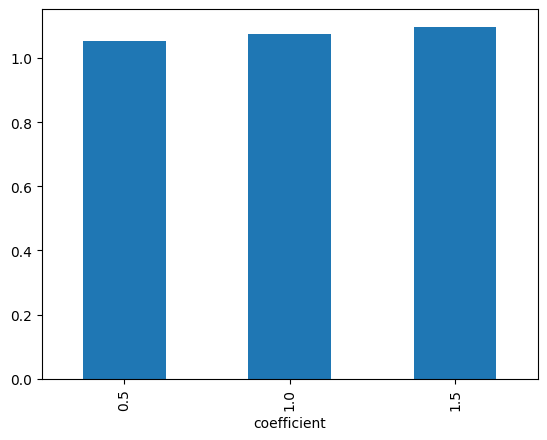

sadness


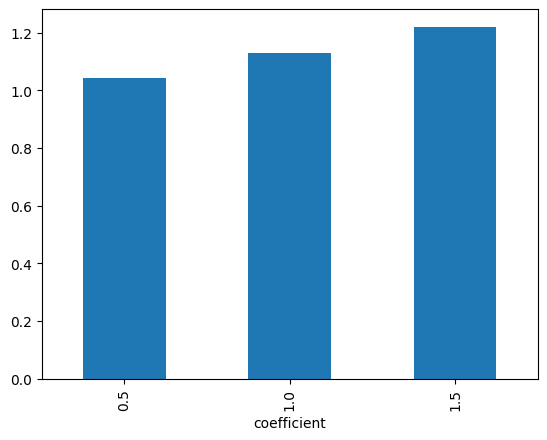

anger


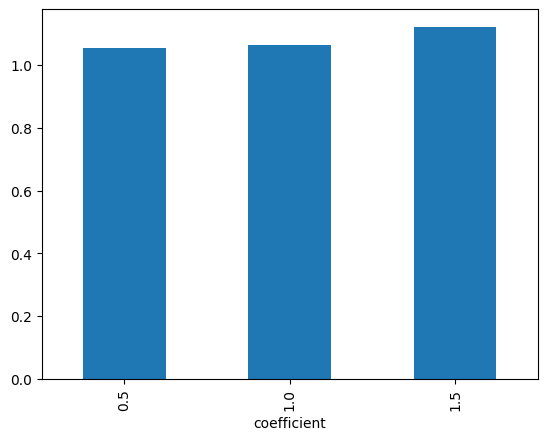

fear


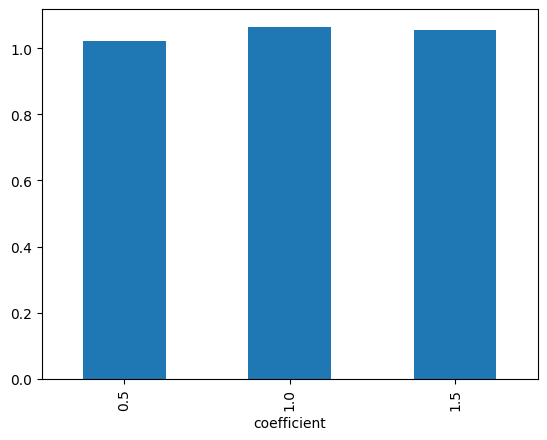

disgust


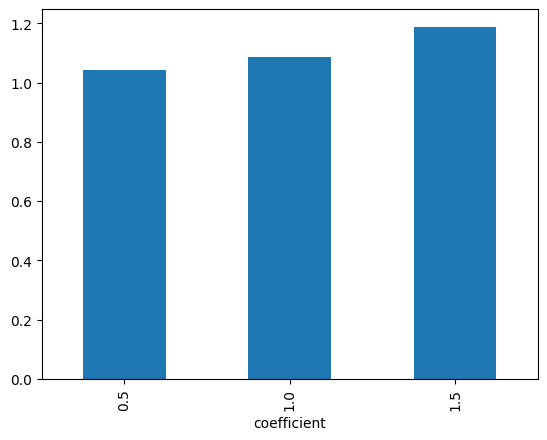

surprise


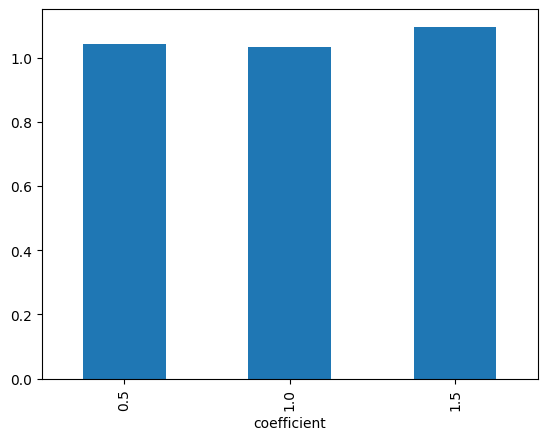

nan


IndexError: index 0 is out of bounds for axis 0 with size 0

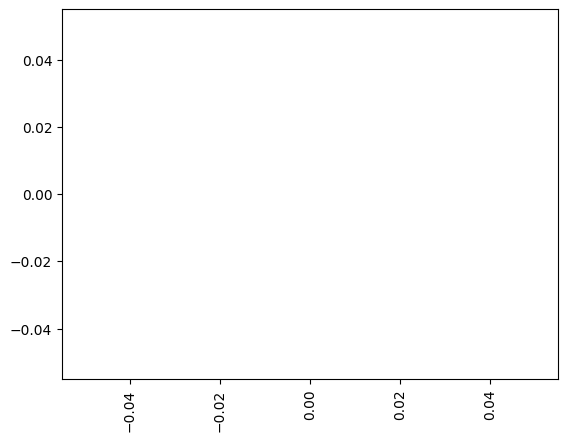

In [8]:
for emotion in df['emotion'].unique():
    print(emotion)
    df[(df['emotion'] == emotion) & (df['option_id'] != -1)].groupby('coefficient')['option_id'].mean().plot(kind='bar')

    plt.show()

